# Machine Learning Homework 1

## Instructions

**Completing the homework:**  Follow along with the text and code in the notebook from start to finish.  There are two parts and 6 graded questions, worth a total of 5 points.  While some code is provided for you in the notebook, there are two types of work left for you:
- **Tasks:** This work is meant to help you better understand the course material an will help you answer the questions.  Importantly, this work is not graded.  Tt is optional, but highly recommended.
- **Questions:** These are the questions you need to answer and that are graded.
    
**How to turn in the homework**:  You need to make **two different Moodle submissions**.  First, you must open the Moodle Homework 1 Answers resources and answer the questions exactly how they correspond to those found in the Notebook (https://moodle.novasbe.pt/mod/quiz/view.php?id=194177).  Second, you must upload your notebook to the Moodle Homework 1 Notebook Upload (https://moodle.novasbe.pt/mod/assign/view.php?id=194176).

This homework is due **before class on Monday, March 8.**

## Imports

Below are the all the imports you will need to complete the homework.  You may use additional libraries if you desire, but they should not be needed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

from matplotlib import pyplot as plt
%matplotlib inline

import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore") 

# Part 1:  Supervised Learning - Model Training and Performance

We will now work on a machine learning problem related to student educational outcomes.  The goal of Part 1 of this  homework assignment is to build a model that can accurately predict whether or not a student will pass their final year of high school.

The data we will use contains **student achievement in high school** for students enrolled in two Portuguese schools. The data features include **student grades, demographics, social and school-related features** and it was collected by using school reports and questionnaires [Cortez and Silva, 2008].  This data comes from a study carried about by Paulo Cortez at the University of Minho, located in Guimaraes, Portugal.  More information on the data and the problem can be found here:   https://www.kaggle.com/dipam7/student-grade-prediction.

The **business context** of this problem is building a machine learning model that can accurately predict if a student will fail their final year of secondary education, so that they may be enrolled pre-emptively into remedial courses.

## Exploratory Data Analysis

First, we will load in the dataset.

In [2]:
data = pd.read_csv("data/students_data.csv")

**Task:** Write some code to inspect the dataset.  How many instances are in the dataset?  How many features?

In [3]:
data.head(5)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13


In [4]:
data.shape

(1044, 35)

<span style="color:green">**Answer:**</span> There are 1044 instances in this dataset, with 35 features.

**Task:**  An important part of any machine learning task is to carry out an Exploratory Data Analysis (or EDA for short) on the data.  You should perform a number of checks, like checking for null/missing values, inspecting the distribution of different features, and performing "sanity checks"  to make sure the data makes sense to you.

For example, the following graph shows the distribution of student's ages in the dataset:

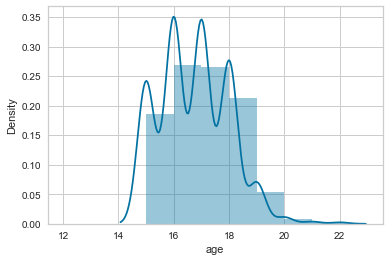

In [5]:
sns.distplot(data.age,bins=np.arange(12,24));

In [6]:
data.groupby("age")["age"].count()

age
15    194
16    281
17    277
18    222
19     56
20      9
21      3
22      2
Name: age, dtype: int64

**Question 1 (0.5 pts):**  How many missing values are there in the age feature?

> a) In range `[0,10]` \
> b) In range `[11,20]` \
> c) In range `[21,30]` \
> d) In range `[31,40]` \
> e) More than `40`

<span style="color:green">**Answer:**</span> There are no missing values for the age feature. Option a) is the correct one.

Once EDA is complete, the dataset would have to be transformed in such a way that models can be trained and fitted to the data.  For example, categorical variables should be one-hot encoded.  One-hot encoding involves turning categorical variables into numerical binary indicators (read more here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - we haven't covered this in the lectures yet but we will get to it later in the semester and it will be discussed in detail.  For now, we have done that for you, and saved the transformed matrix in the file "X.csv".  The label has also been saved in a seperate file called "y.csv".  We will now load those files:

In [7]:
X = pd.read_csv("matrices/X.csv",index_col=0)
y = pd.read_csv("matrices/y.csv",index_col=0,squeeze = True)

**Task:** Inspect the transformed matrix `X` to understand the difference between `X` and the raw data.

In [8]:
data.head(10)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1,5,1,3,5,5,0,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3,4,5,1,2,5,4,9,10,11


In [9]:
X.head(10)

,absences,failures,grade1,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,activities,nursery,internet,romantic,school_gp,address_urban,famsize_gt3,Pstatus_togethor,sex_female,health_mjob,other_mjob,services_mjob,teacher_mjob,health_fjob,other_fjob,services_fjob,teacher_fjob,home_reason,other_reason,reputation_reason,mother_guardian,other_guardian
0,12,0,15,1,1,3,2,1,1,4,5,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,2,0,17,1,2,5,3,4,1,3,3,1,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,2,9,2,1,4,4,5,3,5,5,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,4,0,14,2,2,4,4,3,1,1,3,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,2,0,12,2,1,4,3,2,1,4,5,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0
5,2,0,11,2,1,3,3,4,4,5,4,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
6,6,0,11,2,2,1,1,1,1,1,5,1,1,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
7,0,0,13,2,1,1,5,1,3,5,5,0,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
8,10,0,7,1,2,4,4,4,1,1,5,0,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0
9,4,0,9,3,2,3,4,5,1,2,5,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [10]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: G3, dtype: int64

## Training Models

Now we will divide the data into training and testing data using the sklearn `train_test_split` function.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

And a logistic regression model will be trained (note that the model is trained using the train datasetes):

In [12]:
clf = LogisticRegression(penalty='l1',C=0.01,solver='liblinear',random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

**Task:**  Identify the `lambda` value of this model.  Is this logistic regression model a Ridge or LASSO model?  The sklearn documentation should help you answer these questions:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

<span style="color:green">**Answer:**</span> The `lambda` value of the model is 100. This is a LASSO model, as seen by the `l1` parameter on the 'penalty' option.

Now that a model has been trained, we can look at some performance metrics.  Here we will calculate the AUC of the model.  Note, importantly, that performance metrics are found on the *test* dataset.

In [13]:
y_pred = clf.predict(X_test) # Fit the model to the test dataset
y_score = clf.predict_proba(X_test)[:,1] 
print(f"AUC: {roc_auc_score(y_test,y_score)}") # Find the performance metric

AUC: 0.9083084433310853


**Question 2 (0.5 pts):** What is the accuracy of this model (use the `accuracy_score` function)?  What is the number of true negatives?

Remember that you should check the performance of a model by predicting on the *test* dataset.

> a) Accuracy in range `[0.7, 0.8]`, true negatives in range `[310,330]` \
> b) Accuracy in range `[0.7, 0.8]`, true negatives in range `[80,100]` \
> c) Accuracy in range `[0.5, 0.6]`, true negatives in range `[310,330]` \
> d) Accuracy in range `[0.5, 0.6]`, true negatives in range `[80,100]`

In [14]:
accuracy_score(y_test,y_pred)

0.7751196172248804

In [15]:
y_test.value_counts()

0    321
1     97
Name: G3, dtype: int64

In [16]:
print(confusion_matrix(y_test, y_pred))

[[321   0]
 [ 94   3]]


<span style="color:green">**Answer:**</span> Option a) is correct.

**Task:** Consider the meaning of the false positive and false negatives.  What do these errors represent?

**Task:** What is the mean squared error of the model?  Again, use the *test* dataset.

In [17]:
mean_squared_error(y_test, y_pred)

0.22488038277511962

**Task:** Plot a ROC curve of the model.  This reference will help you: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py.

In [18]:
from sklearn.metrics import plot_roc_curve

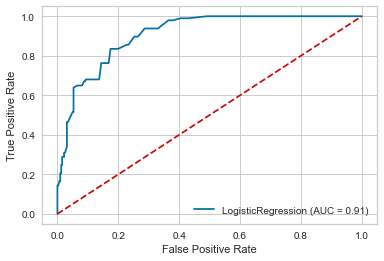

In [19]:
plot_roc_curve(clf, X_test, y_test)
plt.plot([0,1],[0,1],'r--');

**Question 3 (1 pt):** Calculate two different AUC values:  one for only the students living in rural areas, and one only for students living in urban areas (use the variable `address_urban`).  Which has a larger AUC?  What does this difference in AUC mean?

**Again**, remember to use the *test* dataset.  Note:  you are using the same model as for the total AUC and the accuacy.

> a) The AUC is higher for urban students.  This means that the model is better performing for urban students.\
> b) The AUC is lower for urban students.  This means that the model is better performing for urban students.\
> c) The AUC is higher for urban students.  This means that the model is worse performing for urban students.\
> d) The AUC is lower for urban students.  This means that the model is worse performing for urban students.\
> e) The AUC is the exact same for both groups.

In [20]:
X_test["y_test"] = y_test
X_test["y_score"] = y_score
rural = X_test.loc[X_test["address_urban"] == 0]
urban = X_test.loc[X_test["address_urban"] == 1]

In [21]:
y_test_rural = rural["y_test"]
y_score_rural = rural["y_score"]
y_test_urban = urban["y_test"]
y_score_urban = urban["y_score"]

In [22]:
print(f"AUC for students living in rural areas: {roc_auc_score(y_test_rural, y_score_rural)}")
print(f"AUC for students living in urban areas: {roc_auc_score(y_test_urban, y_score_urban)}")

AUC for students living in rural areas: 0.8814176245210728
AUC for students living in urban areas: 0.9185482842199261


<span style="color:green">**Answer:**</span> The Auc for students living in urban areas is slightly higher than for students living in rural areas. This means the model performs better for urban students.
<br>
Option a) is correct.

**Task:** Do the same for gender.

**Quesion 4 (1 pt):**  Train 4 new models.  Two LASSO models with `C` values of `1.0` and `0.001`, and two Ridge models with the same set of `C` values.  Find the accuracy score of all these models.  Which combination of hyperparemeters of these 4 models has the highest performance?

**IMPORTANT:** Train all of your models with the parameter `random_state=42` and `solver='liblinear'` like we did earlier in the Notebook.  Train the models using the *train* dataset, and find the accuracy using the *test* dataset.

> a) `penalty=l1`,`C=1.0` \
> b) `penalty=l1`,`C=0.001` \
> c) `penalty=l2`,`C=1.0` \
> d) `penalty=l2`,`C=0.001`

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [24]:
model1 = LogisticRegression(penalty='l1',C=1 ,solver='liblinear',random_state=42).fit(X_train, y_train)

In [25]:
model2 = LogisticRegression(penalty='l1',C=0.001 ,solver='liblinear',random_state=42).fit(X_train, y_train)

In [26]:
model3 = LogisticRegression(penalty='l2',C=1 ,solver='liblinear',random_state=42).fit(X_train, y_train)

In [27]:
model4 = LogisticRegression(penalty='l2',C=0.001 ,solver='liblinear',random_state=42).fit(X_train, y_train)

In [28]:
y_pred1 = model1.predict(X_test)

In [29]:
y_pred2 = model2.predict(X_test)

In [30]:
y_pred3 = model3.predict(X_test)

In [31]:
y_pred4 = model4.predict(X_test)

In [32]:
print(f"Accuracy Score for model 1: {accuracy_score(y_test,y_pred1)}")
print(f"Accuracy Score for model 2: {accuracy_score(y_test,y_pred2)}")
print(f"Accuracy Score for model 3: {accuracy_score(y_test,y_pred3)}")
print(f"Accuracy Score for model 4: {accuracy_score(y_test,y_pred4)}")

Accuracy Score for model 1: 0.8779904306220095
Accuracy Score for model 2: 0.7679425837320574
Accuracy Score for model 3: 0.8708133971291866
Accuracy Score for model 4: 0.7799043062200957


<span style="color:green">**Answer:**</span> The model with the highest accuracy score is `model 1`, with l1 penalty and a `C` of 1.
<br>
Option a) is correct.

# Part 2: Unsupervised Learning - Clustering

We are going to import our data.  Unlike the last problem, here we will give you absolutely no context for the data.  It might be student data, it might be rocket telemetry data, or it might just be noise.

In [33]:
X = pd.read_csv('data/clusters.csv',header=None)

**Task:** Inspect the data.  What can you infer, if anything, from the data?

In [34]:
X.shape

(300, 4)

In [35]:
X.head(5)

,0,1,2,3
0,2.213399,4.207888,-10.948166,10.144451
1,6.401675,-6.435202,-7.365121,-6.613010
2,1.587804,3.852279,-9.366176,8.919448
3,-2.295104,7.768547,4.813060,2.358487
4,4.955896,-5.851557,-7.352092,-7.435499


When looking at clustering examples in class, our data normally had just one, two, or three features.  This was very convenient because we could plot the data to try and visually identify the number of clusters in the data.  Recall that with one feature we could plot the data along a line, with two features we could plot the data on a normal `x,y`-graph to try and identify groups of points, and with three features we could add a `z` axis and do the same in 3-dimensional space.

Unfortunately for us, the data has 4 features.  This means that the data is in "4-dimensional" space, and we can't just plot it to see the number of clusters.

However, there are some things we can do to get an idea of the data.  For example, we can plot a distribution of just a single feature:

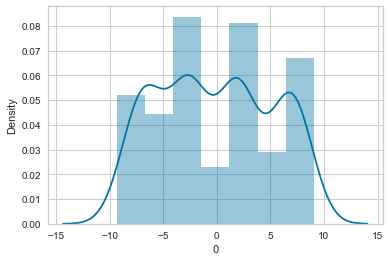

In [36]:
sns.distplot(X[0]);

**Task:** Do a general inspection of the values of the features of the data.  Do each of the features have similiar distributions?  What if you create `x,y` plots for combinations of two of the features?  The same for `x,y,z` plots for combinations of three of the features?  Try and gain an intuition of how the data is distributed.

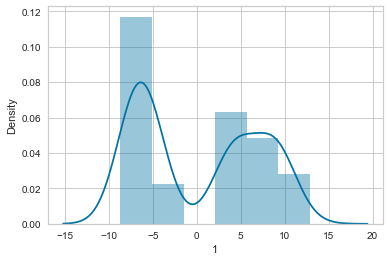

In [37]:
sns.distplot(X[1]);

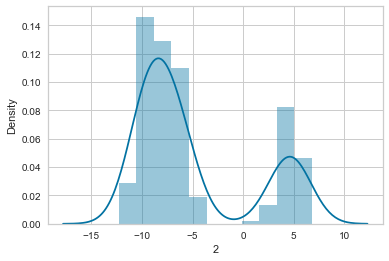

In [38]:
sns.distplot(X[2]);

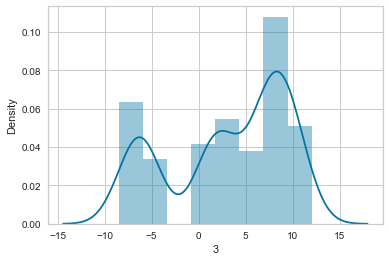

In [39]:
sns.distplot(X[3]);

**Task:** Now it is time to use an unsupervised method to find the number of clusters in the data.  Here we are asking you to use the KMeans clustering method in conjuction with the Elbow method to try and identify how many clusters are in the data.  You can use the implementation from the notebook related class 3.  Alternatively, the following documentation should be helpful: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html.

Try not to just copy and paste code.  Think about what the code means, and importantly, think about what the elbow plot means.  What is the x-axis?  What is the y-axis?  Why does it look the way it does?

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
scaled_features = StandardScaler().fit_transform(X)

In [42]:
X.head(5)

,0,1,2,3
0,2.213399,4.207888,-10.948166,10.144451
1,6.401675,-6.435202,-7.365121,-6.613010
2,1.587804,3.852279,-9.366176,8.919448
3,-2.295104,7.768547,4.813060,2.358487
4,4.955896,-5.851557,-7.352092,-7.435499


In [43]:
scaled_features[:5]

array([[ 0.45125923,  0.59675506, -1.03812406,  1.13397674],
       [ 1.25425567, -0.96974141, -0.41326734, -1.57313292],
       [ 0.3313171 ,  0.54441502, -0.76223669,  0.93608188],
       [-0.41313267,  1.12082843,  1.71051749, -0.12381867],
       [ 0.97706388, -0.88383804, -0.41099519, -1.70600316]])

In [44]:
kmeans_kwargs = {
      "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
 }

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

In [45]:
sse

[1199.999999999999,
 702.9434632093867,
 248.03682659445477,
 32.98002564397259,
 31.14631062675906,
 29.35337945464046,
 27.740369348632772,
 26.29486779808254,
 25.000324223578897,
 23.628940973401342]

**Quesion 5 (1 pt):**  How many clusters are there in the data?

> a) `2` \
> b) `3` \
> c) `4` \
> d) `5`

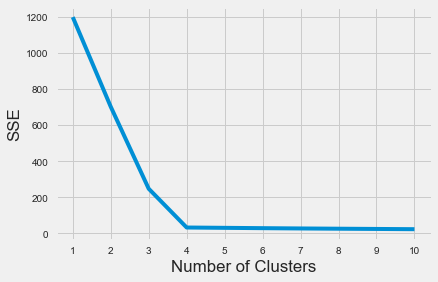

In [46]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show();

In [47]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

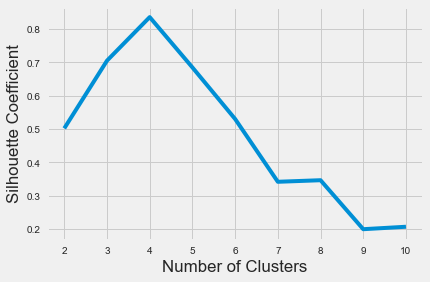

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show();

<span style="color:green">**Answer:**</span> There are 4 clusters in the data.
<br>
Option c) is the correct one.

**Question 6 (1 pt):**  Fit a KMeans model to the data with the correct number of clusters.  Which cluster is the data point `[-9,-9,-9,-9]` in?

You may find the following documnetation helpful:  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

**IMPORTANT:** Use the method from sk-learn (see link above) and the parameter `random_state=42` when fitting your KMeans model.

> a) `0` \
> b) `1` \
> c) `2` \
> d) `3` \
> e) `4` 

In [49]:
nn_clustering = KMeans(n_clusters=4, init='k-means++', random_state=42, algorithm='auto').fit(X)

In [50]:
nn_clustering.predict([[-9,-9,-9,-9]])

array([0])

<span style="color:green">**Answer:**</span> The data point `[-9,-9,-9,-9]` is in cluster 0. <br>
Option a) is correct.